In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
mean_gray = 0.1307
stddev_gray = 0.3081 # these values are mean and standard deviation of all the mnist dataset !!
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((mean_gray,),(stddev_gray))])

train_dataset = datasets.MNIST(root = "./data",
                               train = True,
                               transform = transforms,
                               download = True)
test_dataset = datasets.MNIST(root = "./data",
                              train = False,
                              transform = transforms) # not gonna download this, just load it from pytorch

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
import matplotlib.pyplot as plt

In [4]:
random_image = train_dataset[20][0].numpy()*stddev_gray + mean_gray

In [5]:
random_image

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

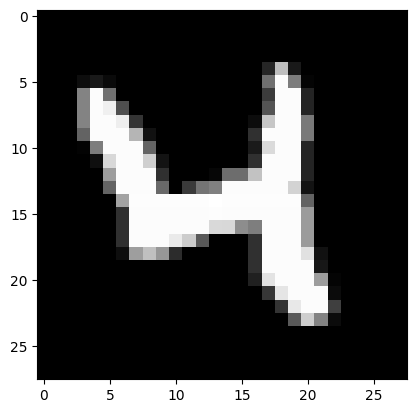

In [8]:
plt.imshow(random_image.reshape(28,28),cmap="gray")

this is the model we defined and we will use it like this
as python has function for all the methods you can imagine so we will just define our class
do whatever we want to do with the dataset by applying functions already available in nn.Module, 
and we will get out result !!


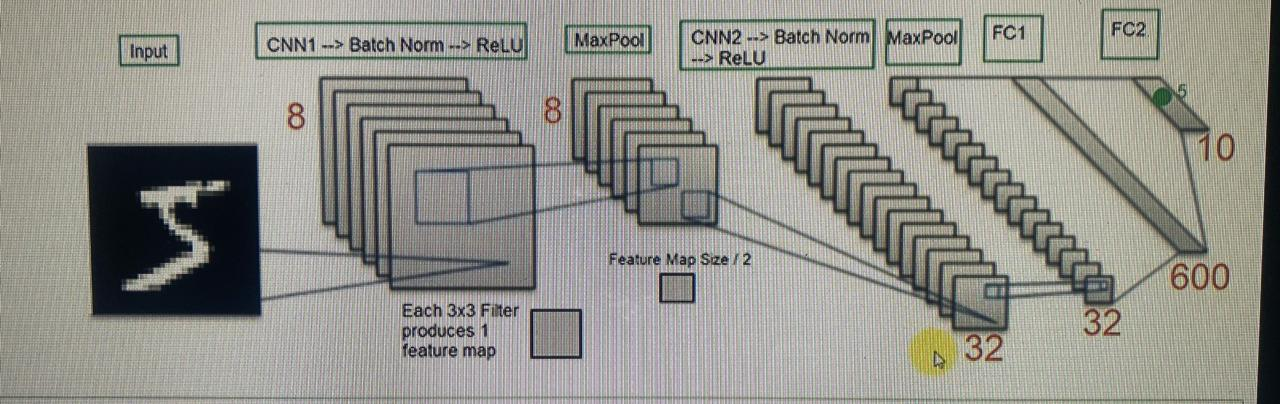

In [13]:
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle = True)
test_load = torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle = True)

In [16]:
print(len(train_load),len(test_load))
print(len(train_dataset),len(test_dataset)) # since each batch is of 100 so divide this by 100 to get same result as above !!

600 100
60000 10000


In [30]:
class CNN (nn.Module) : 
    def __init__(self) :
        super(CNN,self).__init__()
        # for same padding i.e. inputsize = outputsize
        # so padding = (filtersize-1)/2
        self.cnn1 = nn.Conv2d(in_channels = 1,out_channels = 8, kernel_size = 3, stride=1, padding=1)
        # for each of 8 outputs size will be (input-filter+2(padding))/stride + 1
        # so (28-3+2(1))/1 + 1 = 28
        self.batchnorm1 = nn.BatchNorm2d(8)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        # outputsize will now be divided by 2 ! so outputsize = 28/2 = 14
        # for same padding p = (filter-1)/2, (5-1)/2 = 2 !
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride = 1, padding = 2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        # flattening 32 feature maps of 7x7 size = 7*7*32 = 1568
        self.fc1 = nn.Linear(1568,600)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(600,10)
    def forward(self,x) : 
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out) 
        out = self.maxpool(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(batch_size,1568) # our view(-1,1568)
        # now feed forward
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

In [31]:
CUDA = torch.cuda.is_available()
model = CNN()
if CUDA :
    model = model.cuda()

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [35]:
# understand what's happening !!
iteration = 0
correct = 0

for i,(inputs,labels) in enumerate (train_load) : 
    if CUDA :
        inputs = inputs.cuda()
        labels = labels.cuda()

    print("For one iteration, this is what happens : ")
    # each tensor propagated through the network should be 4 dimensional tensor = (batch_size,channels,rows,cols) !!!
    print(f"Input shape : {inputs.shape}")
    print(f"Labels shape : {labels.shape}")
    output = model(inputs)
    print(f"Outputs shape : {output.shape}")
    _,preds = torch.max(output,1) # maximum accors 10 predictions it made in dimension 1 i.e. cols !
    print(f"Preds shape : {preds.shape}")
    print(f"Predicted Tensor : {preds}")
    correct += (preds==labels).sum()
    break

For one iteration, this is what happens : 
Input shape : torch.Size([100, 1, 28, 28])
Labels shape : torch.Size([100])
Outputs shape : torch.Size([100, 10])
Preds shape : torch.Size([100])
Predicted Tensor : tensor([3, 8, 4, 3, 4, 4, 4, 9, 4, 3, 3, 4, 4, 9, 3, 4, 8, 4, 4, 7, 9, 9, 4, 7,
        3, 4, 9, 3, 9, 4, 4, 4, 3, 3, 4, 9, 9, 4, 7, 9, 4, 9, 4, 9, 4, 5, 9, 9,
        3, 9, 2, 6, 4, 3, 6, 2, 9, 4, 4, 3, 3, 9, 3, 3, 4, 4, 9, 2, 0, 4, 9, 9,
        2, 4, 3, 9, 9, 3, 4, 3, 4, 4, 4, 9, 3, 2, 2, 9, 2, 9, 6, 9, 1, 4, 0, 4,
        5, 3, 4, 3], device='cuda:0')


In [ ]:
# training the CNN
epochs = 10
train_loss = [] 
train_acc = []
test_loss = [] 
test_acc = []

for e in range(epochs) :
    correct = 0 
    iteration = 0
    iter_loss = 0.0
    model.train() # tells pytorch that we are in training phase !!
    for i,(inputs,labels) in enumerate (train_load) : 
        if CUDA : 
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        iter_loss += loss.item() 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _,preds = torch.max(outputs,1)
        correct += (preds == labels).sum().item()
        iteration += 1
    train_loss.append(iter_loss/iteration)
    train_acc.append(100*correct/len(train_dataset))

        
    # testing phase for each epoch
    epoch_test_loss = 0.0
    correct = 0
    iteration = 0
    model.eval() # tells pytorch that we are testing now !
    for i,(inputs,labels) in enumerate (test_load) : 
        if CUDA : 
            inputs = inputs.cuda()
            labels = labels.cuda()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        epoch_test_loss += loss.item() 
        # no need to backpropagate !!
        _,preds = torch.max(outputs,1)
        correct += (preds == labels).sum().item()
        iteration += 1
    test_loss.append(epoch_test_loss/iteration)
    test_acc.append(100*correct/len(test_dataset))

    print(f"Epoch : {e+1}/{epochs}")
    print(f"Training Loss : {train_loss[-1]:.3f}")
    print(f"Training Acc : {train_acc[-1]:.3f}")
    print(f"Testing Loss : {test_loss[-1]:.3f}")
    print(f"Testing Acc : {test_acc[-1]:.3f}")

Epoch : 1/10
Training Loss : 0.104
Training Acc : 97.068
Testing Loss : 0.044
Testing Acc : 98.420
Epoch : 2/10
Training Loss : 0.081
Training Acc : 97.730
Testing Loss : 0.033
Testing Acc : 98.900
Epoch : 3/10
Training Loss : 0.073
Training Acc : 97.972
Testing Loss : 0.034
Testing Acc : 98.940
